In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sn

In [73]:
#load multiple excel sheet
CustD= pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
CustD.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\3461135294.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustD= pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [74]:
#check missing value n data type
CustD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

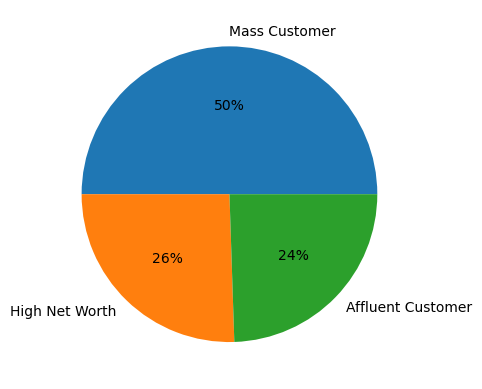

In [75]:
mp.pie(CustD.wealth_segment.value_counts(),
        labels=CustD.wealth_segment.value_counts().index,
        autopct='%.0f%%')
mp.show()

In [76]:
#we have missing value in last name, dob, job_title, job_ondustry category, default, and tenure

In [77]:
#Check duplicate
duplicate1= CustD[CustD.duplicated()]
print("Duplicate rows:")

Duplicate rows:


In [78]:
#load multiple excel sheet
ca= pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [79]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [80]:
duplicate3=ca[ca.duplicated()]
print("Duplicate row:")

Duplicate row:


In [81]:
#inconsisten name
ca['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [82]:
ca['state']=ca['state'].replace('New South Wales','NSW')
ca['state']=ca['state'].replace('Victoria','VIC')

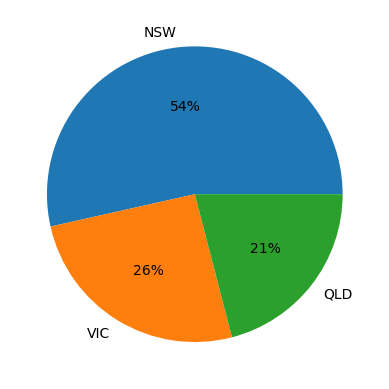

In [83]:
mp.pie(ca.state.value_counts(),
        labels=ca.state.value_counts().index,
        autopct='%.0f%%')
mp.show()

In [84]:
tr=pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [85]:
#change product first sold date format
tr['product_first_sold_date'] = pd.to_datetime(tr['product_first_sold_date'],errors='coerce',unit='d',origin='1900-01-01')
tr

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-12
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19


In [86]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [87]:
#we have missing value in online_order, brand, job_title, standard_cost etc
#fill nan values with mean data standard cost by grouping brand
tr['standard_cost']=tr['standard_cost'].fillna(tr.groupby('brand')['standard_cost'].transform('mean'))
#miising value in job industry category will fill  other
tr['brand']=tr['brand'].fillna('Other')
tr['revenue']=tr['list_price']-tr['standard_cost']
tr

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,revenue
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-12,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19,91.15


In [88]:
a=tr.groupby('brand')['standard_cost'].mean()
a

brand
Giant Bicycles    760.213853
Norco Bicycles    615.029333
OHM Cycles        496.346208
Other                    NaN
Solex             489.707506
Trek Bicycles     569.076308
WeareA2B          427.674792
Name: standard_cost, dtype: float64

In [89]:
#data not complete so we remove other data to know revenue
tr2=tr[tr['brand']!='Other']
tr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [90]:
pb= tr2.groupby('brand')['list_price'].sum()
scb= tr2.groupby('brand')['standard_cost'].sum()
rb= tr2.groupby('brand')['revenue'].sum()

data=(pb, scb, rb)
new2= pd.DataFrame(data)
new2= new2.T
new2['Quantity']=tr2.groupby('brand')['brand'].count()

#get the average price best seling brand
new2['ave_price']=tr2.groupby('brand')['list_price'].mean()
new2


,list_price,standard_cost,revenue,Quantity,ave_price
brand,,,,,
Giant Bicycles,4091668.66,2.517828e+06,1.573840e+06,3312,1235.407204
Norco Bicycles,2657419.13,1.789735e+06,8.676838e+05,2910,913.202450
OHM Cycles,2993420.35,1.510382e+06,1.483039e+06,3043,983.706983
Solex,4496577.63,2.082726e+06,2.413852e+06,4253,1057.271956
Trek Bicycles,3539512.36,1.701538e+06,1.837974e+06,2990,1183.783398
WeareA2B,4163083.61,1.409188e+06,2.753895e+06,3295,1263.454813


Text(0.5, 1.0, 'Revenue(%)')

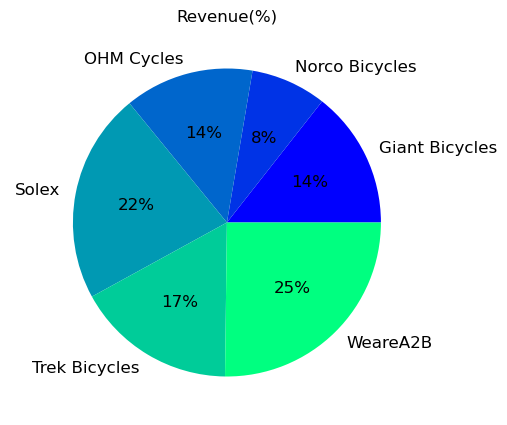

In [91]:
rev=tr2.groupby('brand')['revenue'].sum()
mp.figure(figsize=(5,5))
revv=rev.plot(kind='pie', cmap='winter', fontsize=12, autopct='%.0f%%')
mp.ylabel(' ')
mp.title('Revenue(%)')

In [92]:
# Combining the preprocessed dataframes 
cust= pd.merge(CustD,ca, on='customer_id')
RFM=pd.merge(cust,new, on='customer_id')
RFM

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,list_price,standard_cost,freq,last_order
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,060 Morning Avenue,2016,NSW,Australia,10,9084.45,6066.36,11,2017-12-23
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,4149.07,1922.81,3,2017-08-24
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,7.0,0 Holy Cross Court,4211,QLD,Australia,9,1047.72,827.15,2,2017-06-18
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,8.0,17979 Del Mar Point,2448,NSW,Australia,4,5903.20,3508.26,6,2017-12-14
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,...,13.0,9 Oakridge Court,3216,VIC,Australia,9,5931.69,1985.14,5,2017-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,19.0,2565 Caliangt Point,2171,NSW,Australia,9,4725.38,2679.54,4,2017-04-18
3485,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,18.0,96 Delladonna Trail,3976,VIC,Australia,5,3744.07,2095.75,3,2017-11-08
3486,3498,Lois,Abrahim,Female,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,...,5.0,3 Nova Point,3012,VIC,Australia,4,5177.06,2029.73,6,2017-08-25
3487,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,...,7.0,310 Stephen Terrace,4073,QLD,Australia,9,7673.48,2718.23,7,2017-11-09


In [93]:
#change in consistant name
RFM['gender'].value_counts()

Female    1756
Male      1653
U           77
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [94]:
RFM['gender']=RFM['gender'].replace(['Female','Femal'], 'F')
RFM['gender']=RFM['gender'].replace('Male', 'M')
RFM['gender'].value_counts()

F    1758
M    1654
U      77
Name: gender, dtype: int64

In [95]:
#RFM stands for recency, frequency, monetary value. 
#In business analytics, we often use this concept to divide customers into different segments, 
#like high-value customers, medium value customers or low-value customers, and similarly many others.

In [96]:
recent_date = RFM['last_order'].max()
RFM['recency'] = RFM['last_order'].apply(
    lambda x: (recent_date - x).days)
RFM

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,address,postcode,state,country,property_valuation,list_price,standard_cost,freq,last_order,recency
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,060 Morning Avenue,2016,NSW,Australia,10,9084.45,6066.36,11,2017-12-23,7
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,6 Meadow Vale Court,2153,NSW,Australia,10,4149.07,1922.81,3,2017-08-24,128
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,...,0 Holy Cross Court,4211,QLD,Australia,9,1047.72,827.15,2,2017-06-18,195
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,17979 Del Mar Point,2448,NSW,Australia,4,5903.20,3508.26,6,2017-12-14,16
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,...,9 Oakridge Court,3216,VIC,Australia,9,5931.69,1985.14,5,2017-10-27,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3496,Danya,Burnyeat,M,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2565 Caliangt Point,2171,NSW,Australia,9,4725.38,2679.54,4,2017-04-18,256
3485,3497,Thia,O'Day,F,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,96 Delladonna Trail,3976,VIC,Australia,5,3744.07,2095.75,3,2017-11-08,52
3486,3498,Lois,Abrahim,F,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,...,3 Nova Point,3012,VIC,Australia,4,5177.06,2029.73,6,2017-08-25,127
3487,3499,Shelton,Tewkesberrie,M,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,...,310 Stephen Terrace,4073,QLD,Australia,9,7673.48,2718.23,7,2017-11-09,51


In [97]:
rfm=RFM[['customer_id','DOB','list_price','standard_cost','freq', 'recency']]
rfm['profit']=rfm['list_price']-rfm['standard_cost']
rfm

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\1994032239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['profit']=rfm['list_price']-rfm['standard_cost']


,customer_id,DOB,list_price,standard_cost,freq,recency,profit
0,1,1953-10-12,9084.45,6066.36,11,7,3018.09
1,2,1980-12-16,4149.07,1922.81,3,128,2226.26
2,4,1961-10-03,1047.72,827.15,2,195,220.57
3,5,1977-05-13,5903.20,3508.26,6,16,2394.94
4,6,1966-09-16,5931.69,1985.14,5,64,3946.55
...,...,...,...,...,...,...,...
3484,3496,1986-04-25,4725.38,2679.54,4,256,2045.84
3485,3497,1986-05-03,3744.07,2095.75,3,52,1648.32
3486,3498,1995-11-02,5177.06,2029.73,6,127,3147.33
3487,3499,1979-06-17,7673.48,2718.23,7,51,4955.25


In [98]:
#if assume >NOW = dt.datetime(2005,5,31)
now= pd.Timestamp('now')
rfm['age']= (now-rfm['DOB']).astype('<m8[Y]')
rfm.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\647298007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['age']= (now-rfm['DOB']).astype('<m8[Y]')


,customer_id,list_price,standard_cost,freq,recency,profit,age
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3413.000000
mean,1751.905704,6339.968793,3151.501384,5.723130,60.807395,3188.467409,45.121594
std,1009.388703,2958.785477,1623.170913,2.326339,57.811419,1793.504117,12.791462
min,1.000000,60.340000,13.440000,1.000000,0.000000,15.080000,21.000000
25%,879.000000,4197.330000,1964.870000,4.000000,17.000000,1905.880000,36.000000
50%,1752.000000,6021.830000,2948.550000,6.000000,44.000000,2916.570000,45.000000
75%,2625.000000,8203.290000,4150.200000,7.000000,85.000000,4270.360000,54.000000
max,3500.000000,19071.320000,12558.020000,14.000000,353.000000,11668.950000,179.000000


In [99]:
#drop data customer 179 yo
rfm2=rfm[rfm['age']!=179]
rfm2.describe()

,customer_id,list_price,standard_cost,freq,recency,profit,age
count,3488.000000,3488.00000,3488.000000,3488.00000,3488.000000,3488.000000,3412.000000
mean,1752.398222,6338.02125,3150.319693,5.72219,60.795585,3187.701557,45.082356
std,1009.114046,2956.97223,1621.901961,2.32601,57.815498,1793.190592,12.586236
min,1.000000,60.34000,13.440000,1.00000,0.000000,15.080000,21.000000
25%,879.750000,4197.06250,1964.795000,4.00000,17.000000,1905.700000,36.000000
50%,1752.500000,6020.51000,2947.790000,6.00000,44.000000,2914.690000,45.000000
75%,2625.250000,8201.97750,4150.110000,7.00000,85.000000,4269.977500,54.000000
max,3500.000000,19071.32000,12558.020000,14.00000,353.000000,11668.950000,91.000000


In [100]:
#monetary= sale price(geeksforgeeks)
rfm2=rfm2.rename(columns={'list_price':'monetary'})
rfm2

,customer_id,DOB,monetary,standard_cost,freq,recency,profit,age
0,1,1953-10-12,9084.45,6066.36,11,7,3018.09,69.0
1,2,1980-12-16,4149.07,1922.81,3,128,2226.26,42.0
2,4,1961-10-03,1047.72,827.15,2,195,220.57,61.0
3,5,1977-05-13,5903.20,3508.26,6,16,2394.94,45.0
4,6,1966-09-16,5931.69,1985.14,5,64,3946.55,56.0
...,...,...,...,...,...,...,...,...
3484,3496,1986-04-25,4725.38,2679.54,4,256,2045.84,36.0
3485,3497,1986-05-03,3744.07,2095.75,3,52,1648.32,36.0
3486,3498,1995-11-02,5177.06,2029.73,6,127,3147.33,27.0
3487,3499,1979-06-17,7673.48,2718.23,7,51,4955.25,43.0


In [101]:
#Ranking Customer’s based upon their recency, frequency, and monetary score
rfm2['R_rank'] = rfm2['recency'].rank(ascending=False)
rfm2['F_rank'] = rfm2['freq'].rank(ascending=True)
rfm2['M_rank'] = rfm2['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm2['R_rank_norm'] = (rfm2['R_rank']/rfm2['R_rank'].max())*100
rfm2['F_rank_norm'] = (rfm2['F_rank']/rfm2['F_rank'].max())*100
rfm2['M_rank_norm'] = (rfm2['F_rank']/rfm2['M_rank'].max())*100
 
rfm2.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm2.head()

,customer_id,DOB,monetary,standard_cost,freq,recency,profit,age,R_rank_norm,F_rank_norm,M_rank_norm
0,1,1953-10-12,9084.45,6066.36,11,7,3018.09,69.0,89.971140,97.834815,97.806766
1,2,1980-12-16,4149.07,1922.81,3,128,2226.26,42.0,12.943723,12.374534,12.370986
2,4,1961-10-03,1047.72,827.15,2,195,220.57,61.0,3.823954,4.316031,4.314794
3,5,1977-05-13,5903.20,3508.26,6,16,2394.94,45.0,77.287157,57.226843,57.210436
4,6,1966-09-16,5931.69,1985.14,5,64,3946.55,56.0,36.103896,40.464583,40.452982


In [102]:
#Calculating RFM score
#RFM score is calculated based upon recency, frequency, monetary value normalize ranks. 
#Based upon this score we divide our customers. 
#Here we rate them on a scale of 5. 
#Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [103]:
rfm2['RFM_Score'] = 0.15*rfm2['R_rank_norm']+0.28 * \
    rfm2['F_rank_norm']+0.57*rfm2['M_rank_norm']
rfm2['RFM_Score'] *= 0.05
rfm2 = rfm2.round(2)
rfm2[['customer_id', 'RFM_Score']].head(3)

,customer_id,RFM_Score
0,1,4.83
1,2,0.62
2,4,0.21


# Rating Customer based upon the RFM score (source: greeksforgeeks)
# rfm score >4.5 : Top Customer
# 4.5 > rfm score > 4 : High Value Customer
# 4>rfm score >3 : Medium value customer
# 3>rfm score>1.6 : Low-value customer
# rfm score<1.6 :Lost Customer

In [104]:
rfm2["customer_segment"] = np.where(rfm2['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm2['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm2['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm2['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm2[['customer_id', 'RFM_Score', 'customer_segment']].head(5)

,customer_id,RFM_Score,customer_segment
0,1,4.83,Top Customers
1,2,0.62,Lost Customers
2,4,0.21,Lost Customers
3,5,3.01,Medium Value Customer
4,6,1.99,Low Value Customers


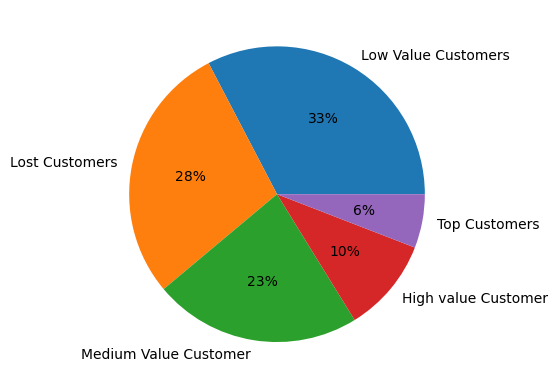

In [105]:
mp.pie(rfm2.customer_segment.value_counts(),
        labels=rfm2.customer_segment.value_counts().index,
        autopct='%.0f%%')
mp.show()

In [106]:
rfm2['age']
def cohort (age):
    if age<31:
        return '< 31'
    elif age<=40:
        return '31-40'
    elif age<=50:
        return '41-50'
    elif age<=60:
        return '51-60'
    else:
        return '60<'
rfm2['cat_age']= rfm2['age'].apply(cohort)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Top Customers'),
  Text(1, 0, 'Lost Customers'),
  Text(2, 0, 'Medium Value Customer'),
  Text(3, 0, 'High value Customer')])

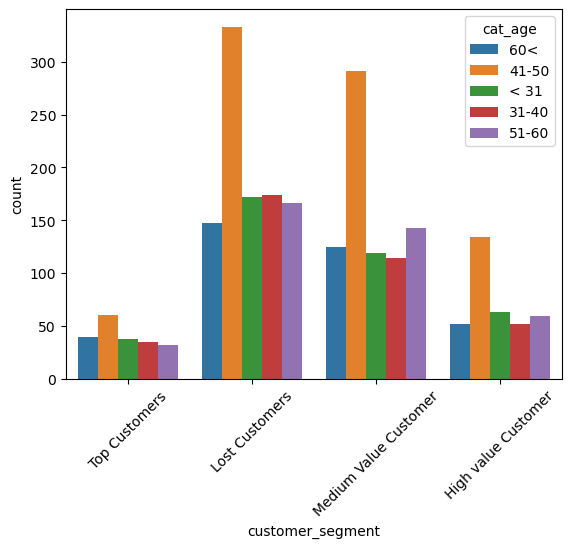

In [107]:
segmnt=rfm2[rfm2['customer_segment'].isin(['Top Customers','High value Customer','Medium Value Customer', 'Low Value Customer', 'Lost Customers'])]
sn.countplot(data=segmnt, x= 'customer_segment', hue='cat_age')
mp.xticks(rotation=45)

In [108]:
a=CustD.filter(['customer_id','job_industry_category'])
rfm2=pd.merge(rfm2,a, on='customer_id')  
rfm2.head(3)

,customer_id,DOB,monetary,standard_cost,freq,recency,profit,age,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,customer_segment,cat_age,job_industry_category
0,1,1953-10-12,9084.45,6066.36,11,7,3018.09,69.0,89.97,97.83,97.81,4.83,Top Customers,60<,Health
1,2,1980-12-16,4149.07,1922.81,3,128,2226.26,42.0,12.94,12.37,12.37,0.62,Lost Customers,41-50,Financial Services
2,4,1961-10-03,1047.72,827.15,2,195,220.57,61.0,3.82,4.32,4.31,0.21,Lost Customers,60<,IT


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Top Customers'),
  Text(1, 0, 'Lost Customers'),
  Text(2, 0, 'Medium Value Customer'),
  Text(3, 0, 'High value Customer')])

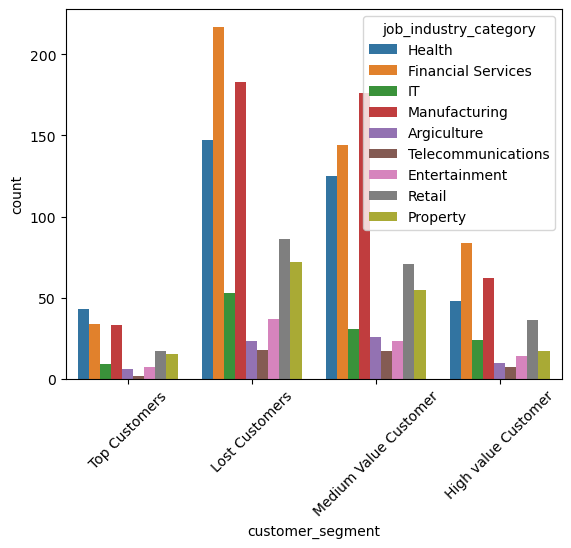

In [113]:
jic=rfm2[rfm2['customer_segment'].isin(['Top Customers','High value Customer','Medium Value Customer', 'Low Value Customer', 'Lost Customers'])]
sn.countplot(data=jic, x= 'customer_segment', hue='job_industry_category')
mp.xticks(rotation=45)

# NEW CUSTOMER ANALYSIS

In [110]:
#load multiple excel sheet
ncl= pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')
ncl.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\3151997865.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  ncl= pd.read_excel(r'C:\Users\HP\Pictures\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.41,0.5125,0.640625,0.544531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.04,1.0400,1.300000,1.105000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.6500,0.650000,0.650000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.95,1.1875,1.187500,1.187500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.59,0.5900,0.737500,0.737500,4,4,1.703125


In [111]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [112]:
ncl['age']= (now-ncl['DOB']).astype('<m8[Y]')
#we will fill missing value with imputasion

#if just year astype('timedelta64[Y]')
ncl['age']
def cohort (age):
    if age<31:
        return '< 31'
    elif age<=40:
        return '31-40'
    elif age<=50:
        return '41-50'
    elif age<=60:
        return '51-60'
    else:
        return '60<'
ncl['cat_group']= ncl['age'].apply(cohort)
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,cat_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.41,0.5125,0.640625,0.544531,1,1,1.718750,65.0,60<
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,1.04,1.0400,1.300000,1.105000,1,1,1.718750,53.0,51-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.65,0.6500,0.650000,0.650000,1,1,1.718750,48.0,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.95,1.1875,1.187500,1.187500,4,4,1.703125,44.0,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.59,0.5900,0.737500,0.737500,4,4,1.703125,57.0,51-60


RFM analysis allows a comparison between potential contributors and clients. It gives organizations a sense of how much revenue comes from repeat customers (vs. new customers)

In [116]:
'The number of potential customers to target: ' + str( len( ncl [(ncl['cat_group']=='41-50') | (ncl['state'] =='NSW') 
                                                                  & (ncl['wealth_segment'] == 'Mass Customer') 
                                                                  & (ncl['job_industry_category'].isin(['Manufacturing','Financial Services','Health']))
                                                                   ] ) )

'The number of potential customers to target: 334'